**THE SPARKS FOUNDATION**

**Task- 3 Perform 'Exploratory Data Analysis' on dataset 'Sample Superstore**

Prepared by : Navanish Shettigar

In [1]:
# Importing all libraries required in this notebook
import numpy as np #For numerical operations
import pandas as pd #For handling the dataset
import matplotlib.pyplot as plt #For visualization
import seaborn as sns
import os
%matplotlib inline

**IMPORTING DATASETS**

In [2]:
#import packages to use
from google.colab import files
data = files.upload()

Saving SampleSuperstore.csv to SampleSuperstore.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(data['SampleSuperstore.csv']))

In [4]:
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


**EXPLORING DATASET**

In [5]:
#getting the information abut dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.duplicated().sum()

17

In [7]:
df.drop_duplicates(inplace=True) #dropping the duplicates values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [9]:
#Here postal code is not a useful column, hence we are dropping it.
df.drop(['Postal Code'],axis=1, inplace=True)

**THE DATASET CONSISTS OF 13 FEATURES AND EACH FEATURE CONSISTS OF 9994 SAMPLES.**

In [10]:
#Check for the null values
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**AS WE SEE THERE ARE NO NULL VALUES PRESENT IN DATASET**

In [11]:
#finding the correlation between the features
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


**HERE THE CORRELATION IS ONLY BY 5 COLUMNS SINCE THE REMAINING COLUMNS CONTAIN NON NUMERICAL VALUES**

**VISUALIZING THE DATASET**

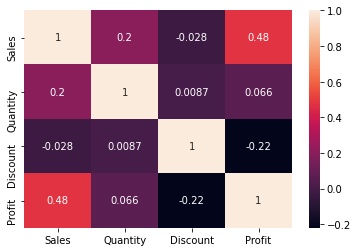

In [12]:
#visualizing the correlation between the features
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

**HERE 1 REPRSENTS STRONG POSITIVE CORRELATION AND -0.2 FOR NEGATIVE CORRELATION**

In [13]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

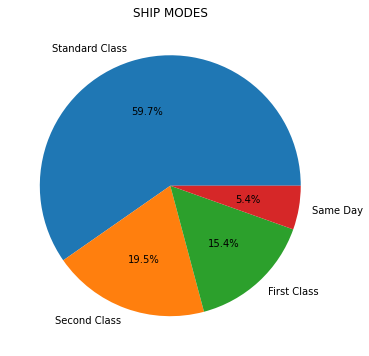

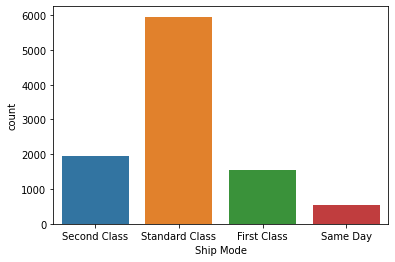

In [14]:
plt.figure(figsize=(6,6))
plt.title('SHIP MODES')
plt.pie(df['Ship Mode'].value_counts(), labels=df['Ship Mode'].value_counts().index, autopct= '%1.1f%%')
plt.show()
sns.countplot(x=df['Ship Mode'])

**IN SHIP MODE , MOST OF THEM ARE PREFERRING THE STANDARD CLASS**

In [15]:
df['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

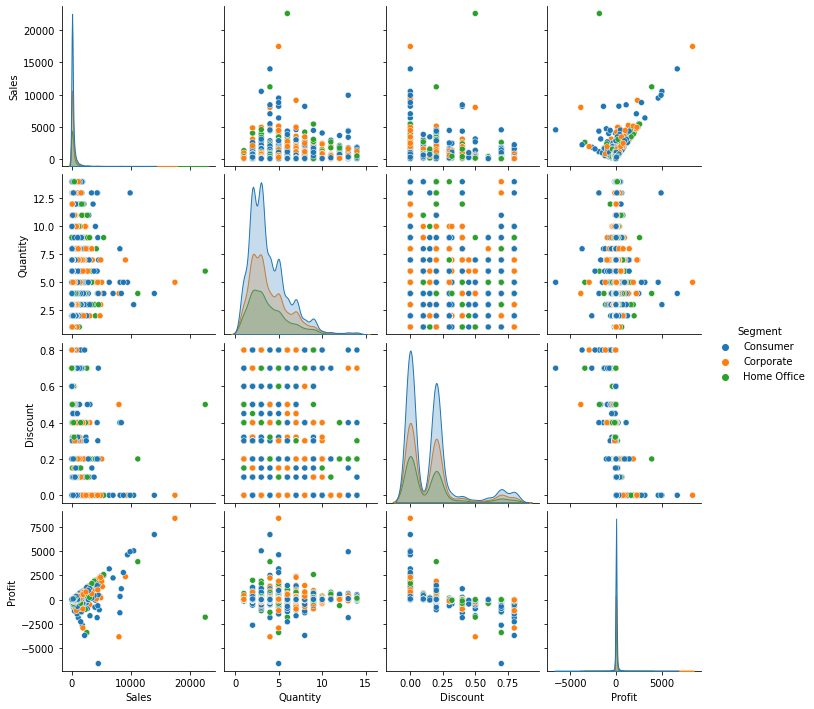

In [16]:
sns.pairplot(df,hue='Segment')

**HERE WE CAN SEE IN SEGMENT , PROFIT AND SALES HAS SOME POSITIVE CORRELATION**

In [17]:
df['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

**HERE OFFICE SUPPLIERS CATEGORY HAS MORE THEN FURNITURE AND TECHNOLOGY**

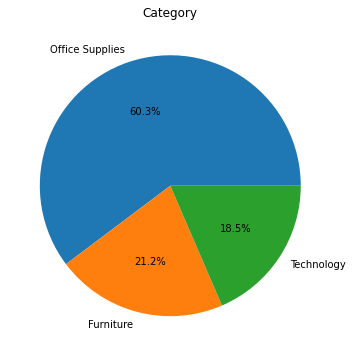

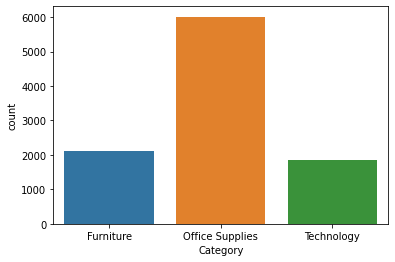

In [18]:
plt.figure(figsize=(6,6))
plt.title('Category')
plt.pie(df['Category'].value_counts(),labels=df['Category'].value_counts().index,autopct='%1.1f%%')
plt.show()
sns.countplot(x='Category',data=df)

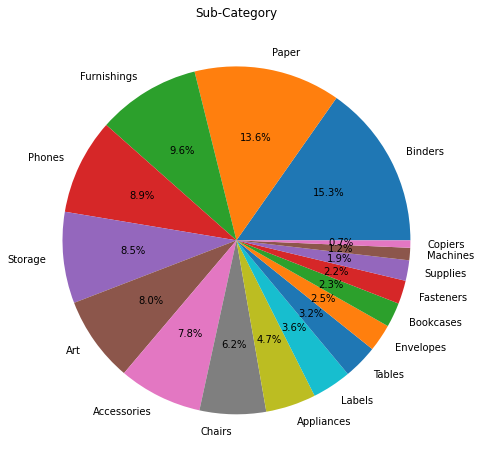

In [19]:
plt.figure(figsize=(8,8))
plt.title('Sub-Category')
plt.pie(df['Sub-Category'].value_counts(),labels=df['Sub-Category'].value_counts().index, autopct='%1.1f%%')
plt.show()

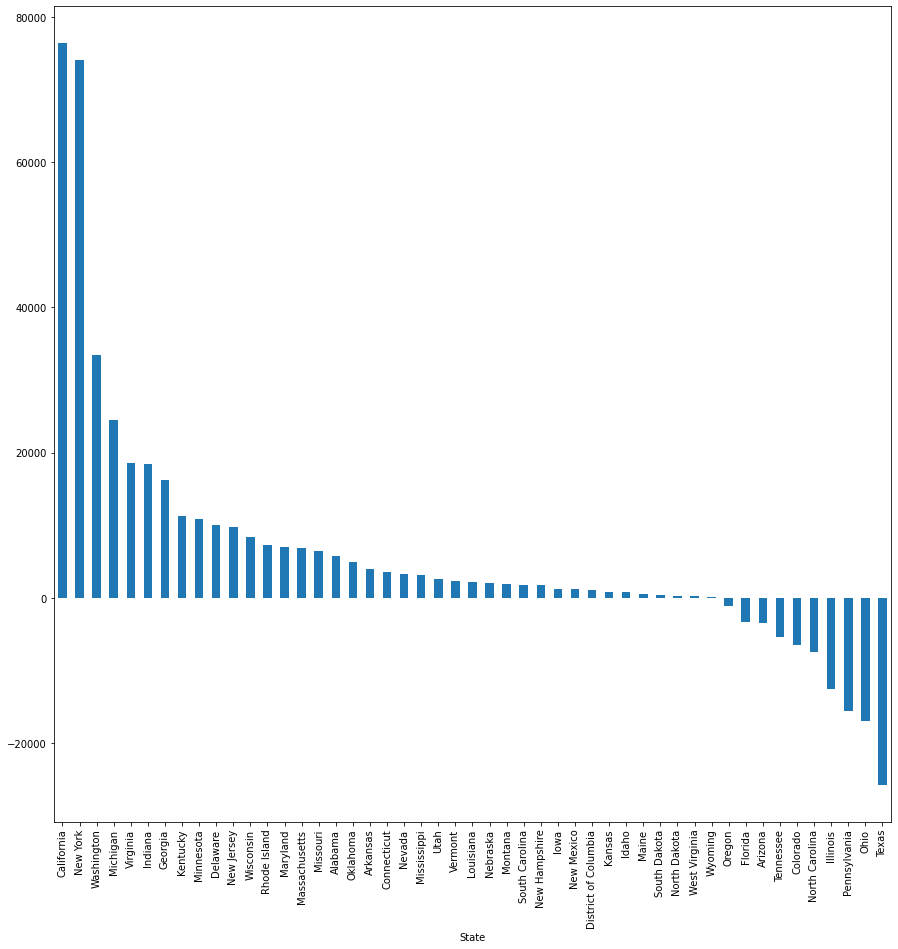

In [20]:
plt.figure(figsize=(15,15))
stpr=df.groupby(['State'])['Profit'].sum().nlargest(50)
stpr.plot.bar()

**GRAPH DISPLAY THAT CALIFORNIA AND NEW YORK HAVE THE HIGHEST PROFITS WHILE TEXAS AND OHIO HAVE THE LEAST PROFITS**

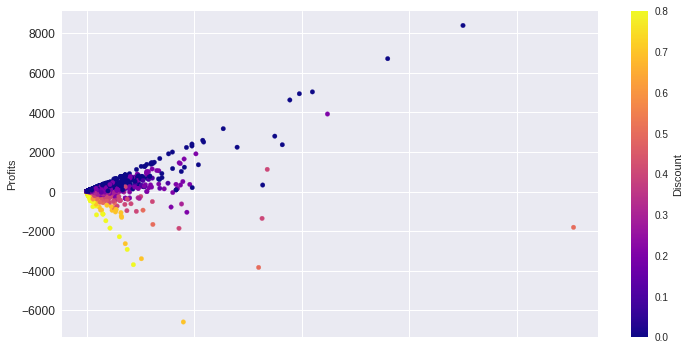

In [21]:
plt.style.use('seaborn')
df.plot(kind="scatter",figsize=(12,6),x="Sales",y="Profit",c="Discount",s=20,fontsize=12,colormap='plasma')
plt.ylabel('Profits')
plt.xlabel('Sales')
plt.show()

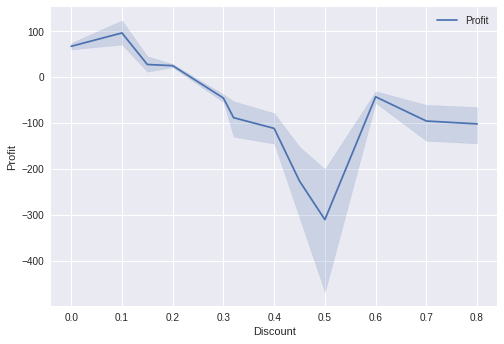

In [22]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=df)
plt.legend()
plt.show()

**WE CAN CLEARLY OBSERVE THAT THE DISCOUNT HAS A NEGATIVE RELATION WITH PROFIT I.E. AS THE PROFIT IS INCREASING THE PROFIT GENERATED IS DECREASED.**

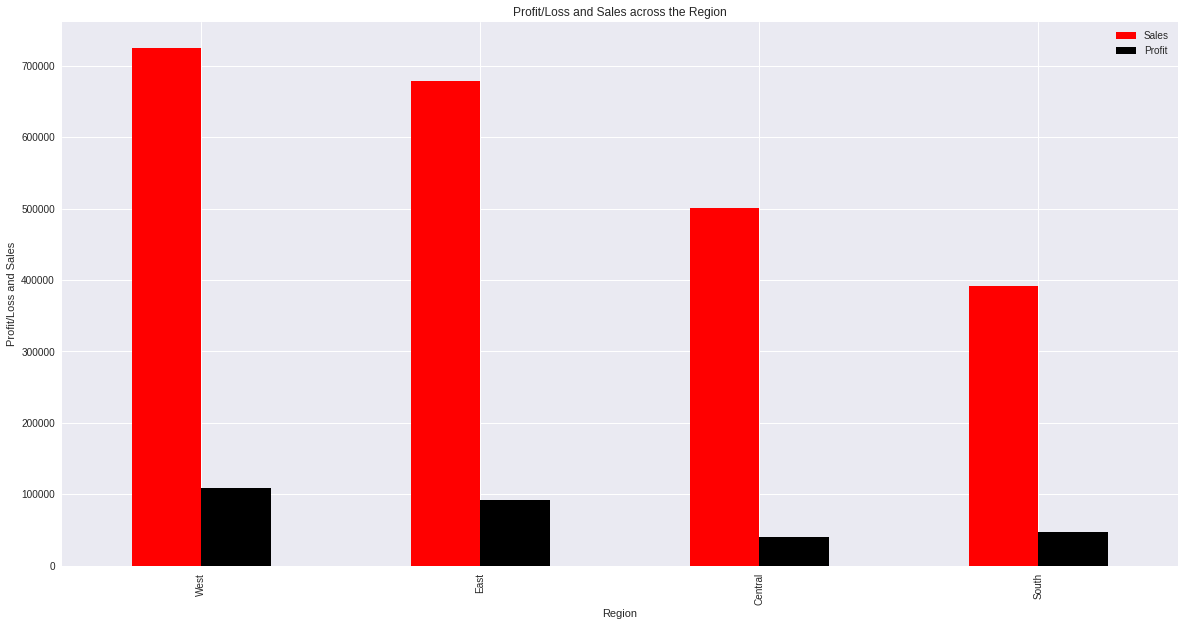

In [23]:
pls=df.groupby('Region')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
pls[:].plot.bar(color=['red','black'],figsize=(20,10))
plt.title('Profit/Loss and Sales across the Region')
plt.xlabel('Region')
plt.ylabel('Profit/Loss and Sales')
plt.show()

**MORE THE DISCOUNT MORE THE SALE BUT LESSER PROFITS**

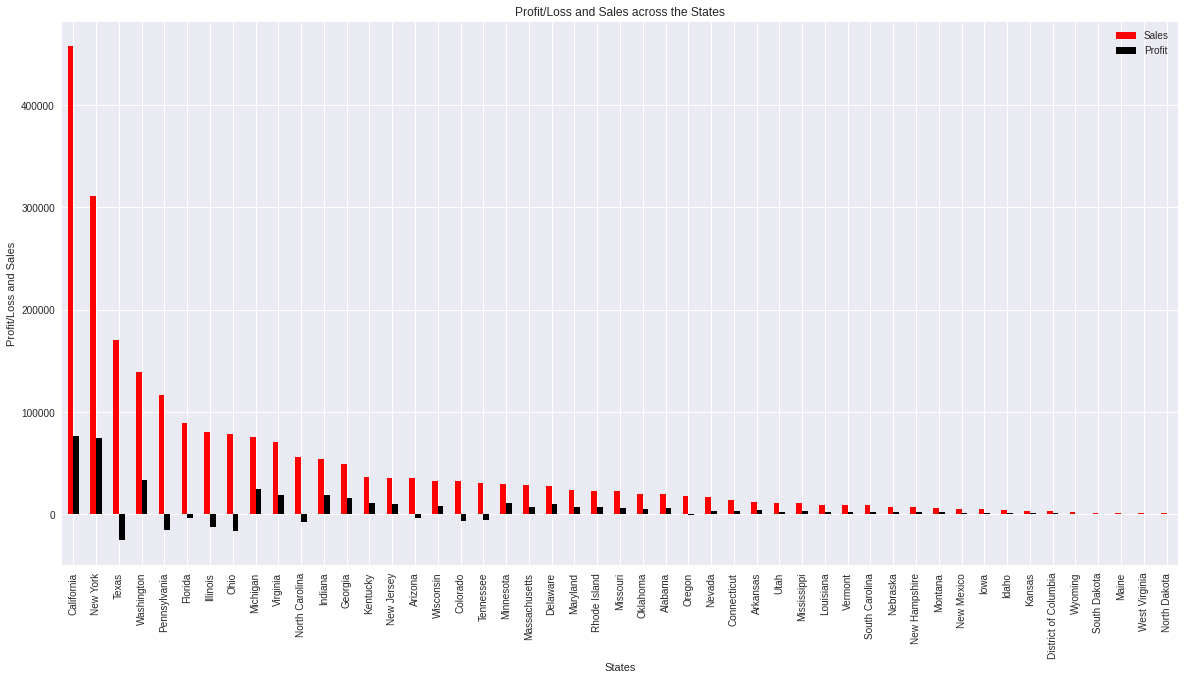

In [24]:
pls=df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
pls[:].plot.bar(color=['red','black'],figsize=(20,10))
plt.title('Profit/Loss and Sales across the States')
plt.xlabel('States')
plt.ylabel('Profit/Loss and Sales')
plt.show()

**CONCLUSIONS**

**Work more on California and New York as they are places of Maximum sales**

**Decrease Discounts in Southern Region to increase sales**

**Reduce sales of furniture as it has very less profit compared to sales.**

**The Profit generated by office supplies category is more, but the sales for office suppliers are less. So, we have to work on increasing the sales for office supplies category.**